In [1]:
## import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Know Your Data

In [2]:
data = pd.read_csv("loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
## shape of the data
data.shape

(614, 13)

In [5]:
## columns of the data
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
## info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
## summary of numerical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
## summary of categorical data
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
## missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
## duplicates
data.duplicated().sum()

0

In [11]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Visualization of target column

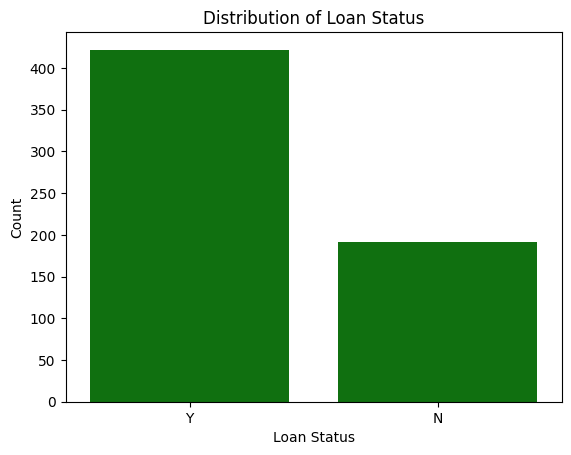

In [12]:
sns.countplot(x='Loan_Status',data=data,color='green')
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [13]:
## dropping unnecessary columns

data.drop('Loan_ID',axis=1,inplace=True)

In [14]:
numeric = data.select_dtypes(include=['float','int']).columns.tolist()
categorical = data.select_dtypes(include='object').columns.tolist()

In [15]:
numeric

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## Visualizing Numerical Features

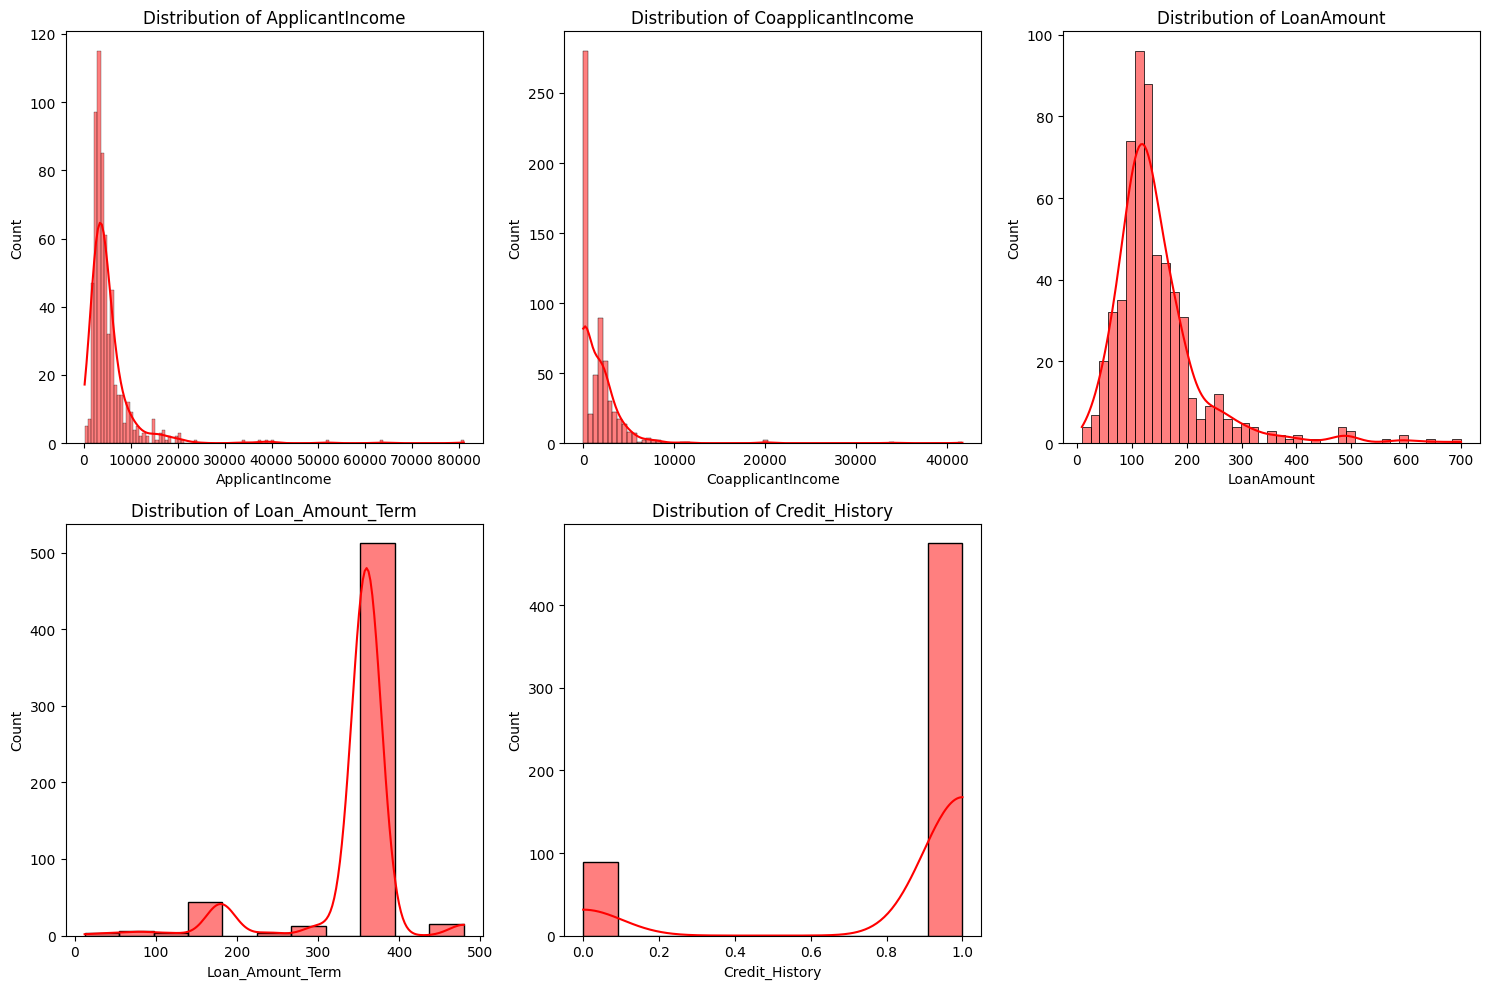

In [17]:
n_cols = 2
n_rows = (len(numeric)+1)//2

plt.figure(figsize=(15,10))

for i,col in enumerate(numeric,1):
    plt.subplot(n_cols,n_rows,i)
    sns.histplot(data[col],kde=True,color='red')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Insights:

1. **ApplicantIncome & CoapplicantIncome:**
    * Most incomes are clustered on the lower end, with a few significant outliers → Income distribution is right-skewed.

2. **LoanAmount:**
    * Majority of loans fall between 100–250 units, again with a few large outliers → Suggests normalization or log scaling could help.

3. **Loan_Amount_Term:**
    * 360 months is the most common term — strong concentration here implies it's the default choice for most loans.

4. **Credit_History:**
    * Skewed toward value 1 → Indicates most applicants have good credit history, which is a critical feature.

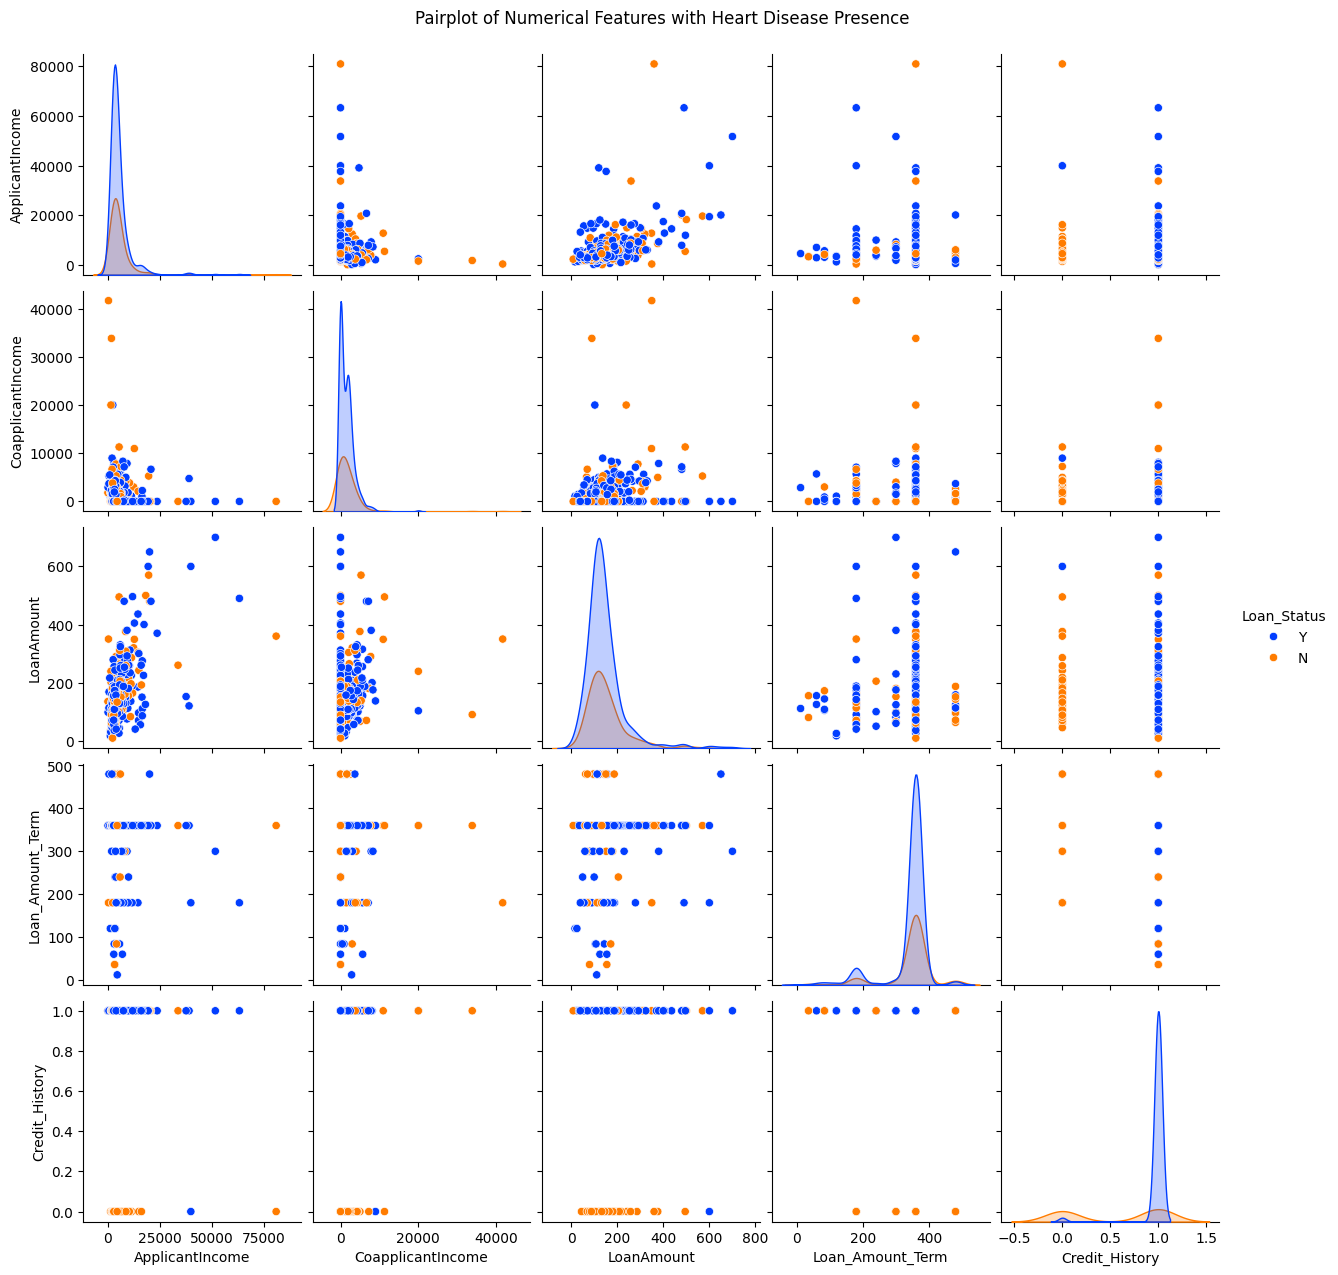

In [19]:
sns.pairplot(data[numeric + ['Loan_Status']], diag_kind='kde', 
             hue='Loan_Status', markers='o', palette='bright')
plt.suptitle('Pairplot of Numerical Features with Heart Disease Presence', y=1.02)
plt.show()

### Insights:

1. **ApplicantIncome & CoapplicantIncome:**
    * Most applicants fall in lower income ranges. Higher incomes show a slight lean toward loan approval (Loan_Status = Y).

2. **LoanAmount:**
    * Smaller loan amounts dominate, and approvals are more common in that lower range.

3. **Loan_Amount_Term:**
    * You can see tight vertical clusters — indicating common term values (like 360, 180 months). Not much separation by approval.

4. **Credit_History:**
    * Super binary, and visually clear — applicants with a credit history are far more likely to get approved (most of the blue dots cluster at Credit_History = 1).

## Visualizing Categorical Features

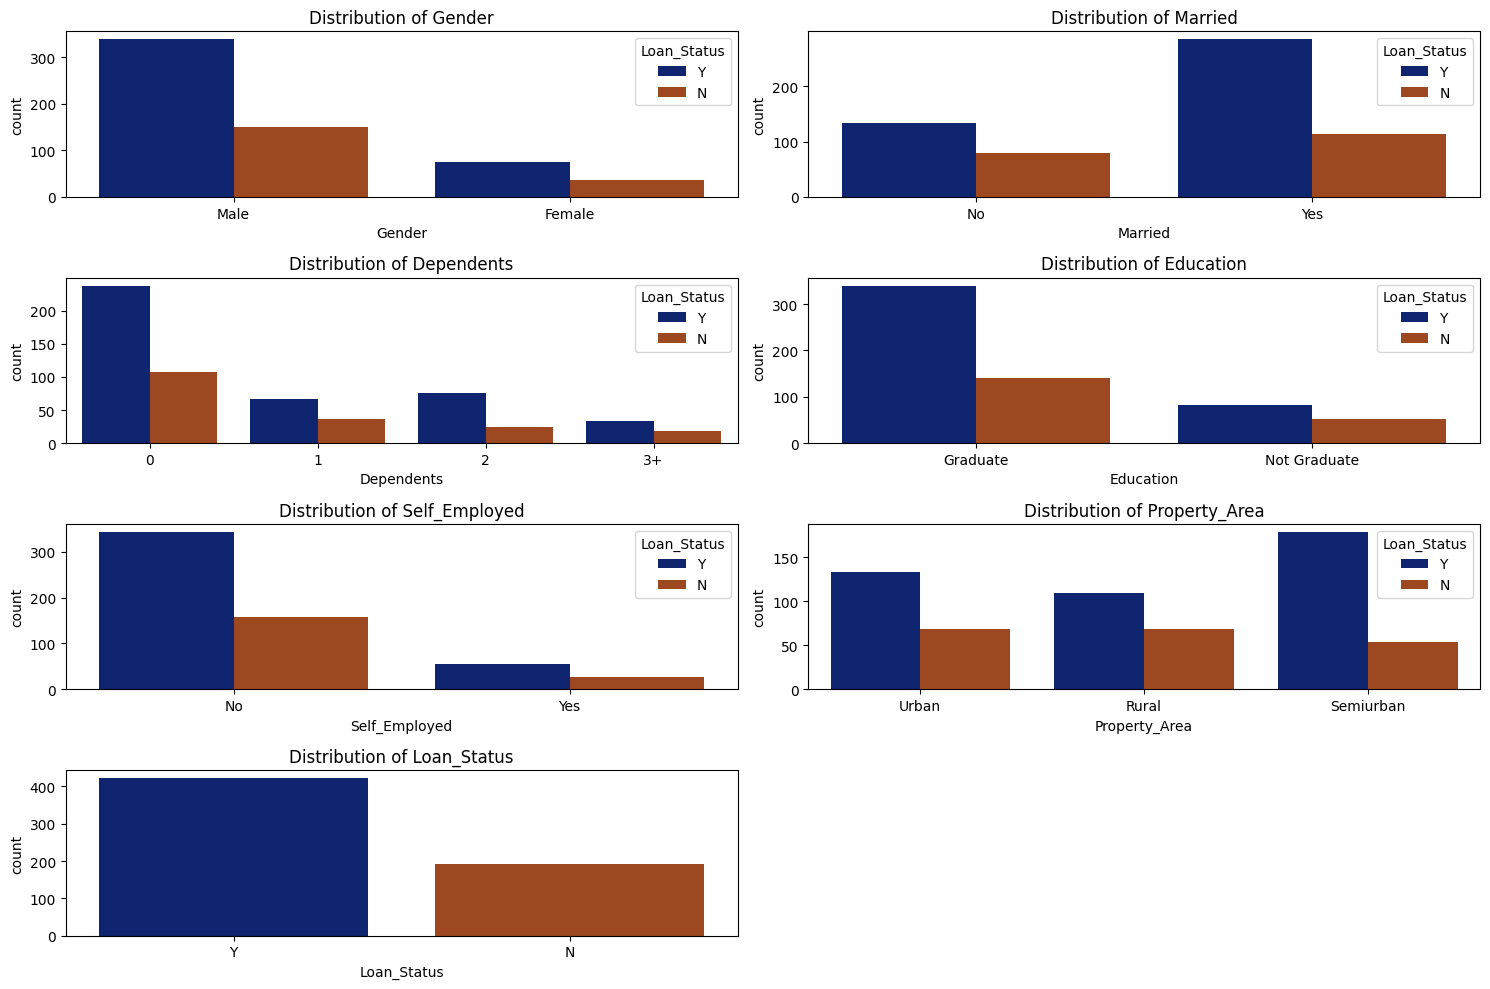

In [20]:
n_cols = 2
n_rows = (len(categorical)+1)//2

plt.figure(figsize=(15,10))
for i,col in enumerate(categorical,1):
    plt.subplot(n_rows,n_cols,i)
    sns.countplot(x=col,data=data,hue='Loan_Status',palette='dark')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Insights:

1. **Gender:** 
    * Males have a noticeably higher approval rate than females.

2. **Marital Status:** 
    * Both married and unmarried applicants get approvals, but married individuals slightly dominate.

3. **Dependents:** 
    * Loan approval seems consistent across all dependent categories—no sharp drop or spike.

4. **Education:** 
    * Graduates are more likely to get loan approval than non-graduates.

5. **Self-Employed:** 
    * Self-employed applicants have fewer approvals compared to those who are not.

6. **Property Area:** 
    * Semiurban areas show the highest approval counts, suggesting possible location-based influence.

## Heat Map of Numerical Features

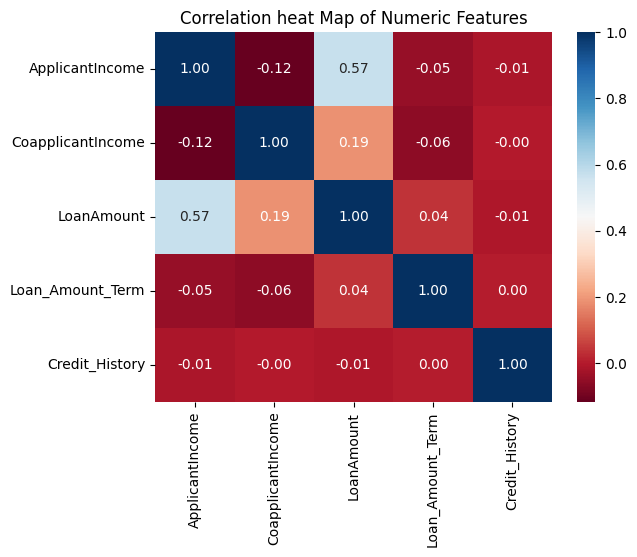

In [21]:
sns.heatmap(data[numeric].corr(),annot=True,cmap='RdBu',fmt='.2f')
plt.title("Correlation heat Map of Numeric Features")
plt.show()

### Insights:

* **ApplicantIncome & LoanAmount:** Correlation = 0.57 → Higher applicant income tends to come with larger loan requests.

* **CoapplicantIncome & LoanAmount:** Correlation = 0.19 → Weak relationship; coapplicant income doesn't impact loan size much.

* **Loan_Amount_Term & Credit_History:** Both show low or negligible correlation with the other numeric features → Their impact on loan approval might be more categorical or non-linear.

In [22]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [23]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

## Visualizing Outliers

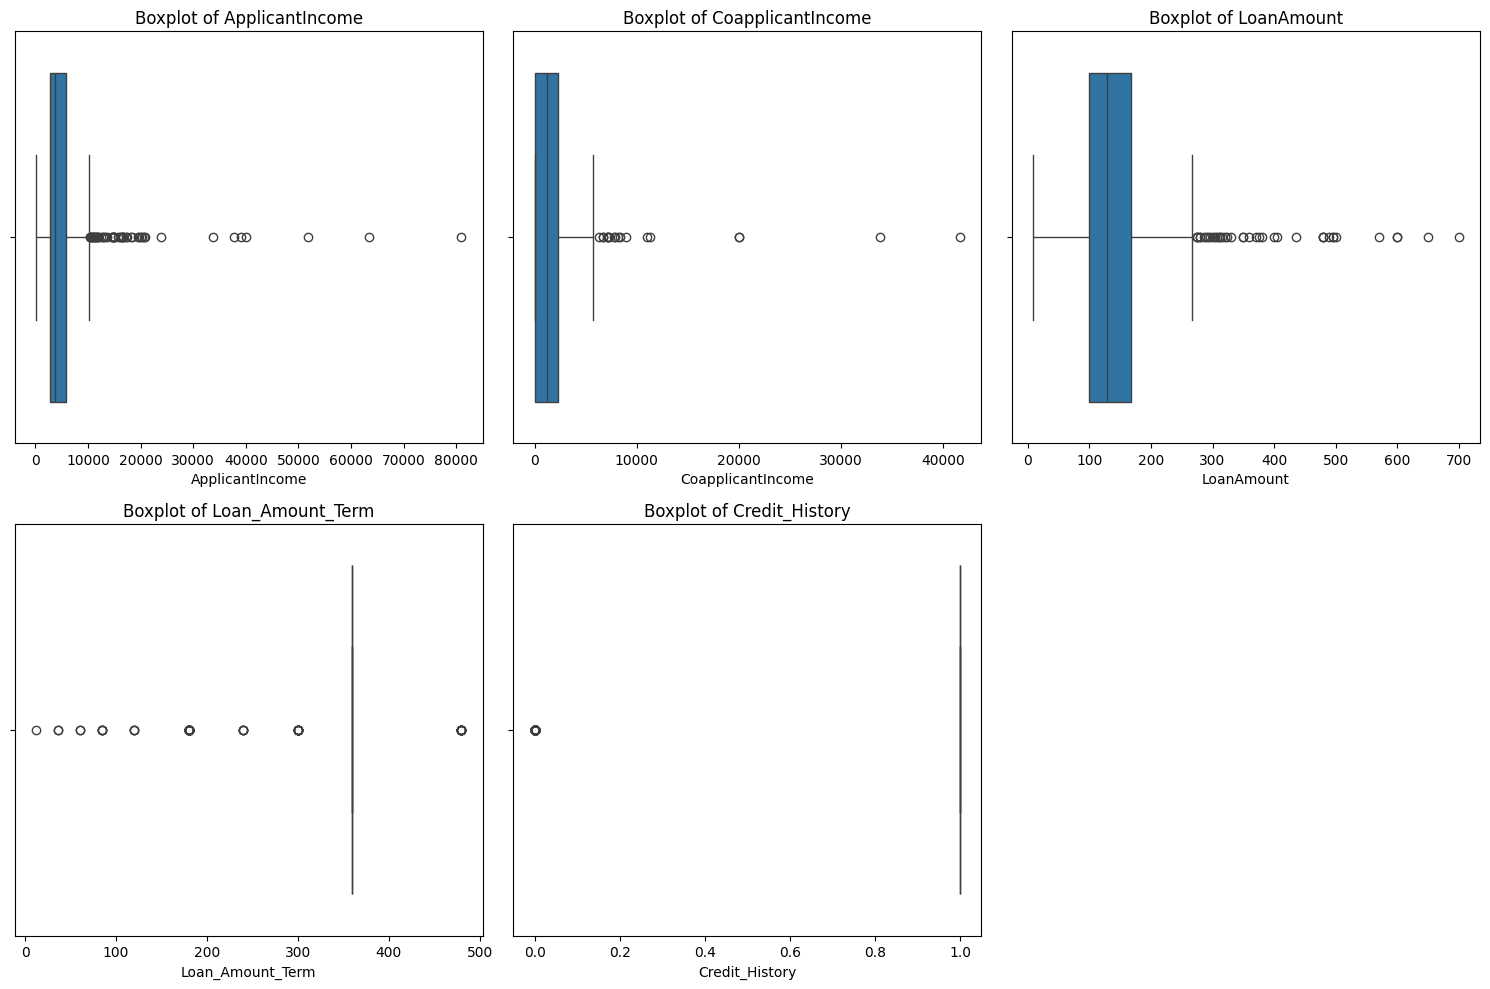

In [24]:
n_cols = 2
n_rows = (len(numeric)+1)//2

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric,1):
    plt.subplot(n_cols,n_rows,i)
    sns.boxplot(x=col,data=data)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [26]:
def winsorize(data,numeric):
    winsorize_data = data.copy()

    for col in numeric:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = ((data[col]<lower_bound) | (data[col]>upper_bound)).sum()

        winsorize_data[col] = data[col].clip(lower=lower_bound,upper=upper_bound)

        after = ((winsorize_data[col]<lower_bound) | (winsorize_data[col]>upper_bound)).sum()

        print(f"feature: {col}, before handling outliers: {before} and after handling outliers: {after}")

    return winsorize_data

In [27]:
winsorize(data,numeric)

feature: ApplicantIncome, before handling outliers: 50 and after handling outliers: 0
feature: CoapplicantIncome, before handling outliers: 18 and after handling outliers: 0
feature: LoanAmount, before handling outliers: 39 and after handling outliers: 0
feature: Loan_Amount_Term, before handling outliers: 88 and after handling outliers: 0
feature: Credit_History, before handling outliers: 89 and after handling outliers: 0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


feature: ApplicantIncome, before handling outliers: 50 and after handling outliers: 0
feature: CoapplicantIncome, before handling outliers: 18 and after handling outliers: 0
feature: LoanAmount, before handling outliers: 39 and after handling outliers: 0
feature: Loan_Amount_Term, before handling outliers: 88 and after handling outliers: 0
feature: Credit_History, before handling outliers: 89 and after handling outliers: 0


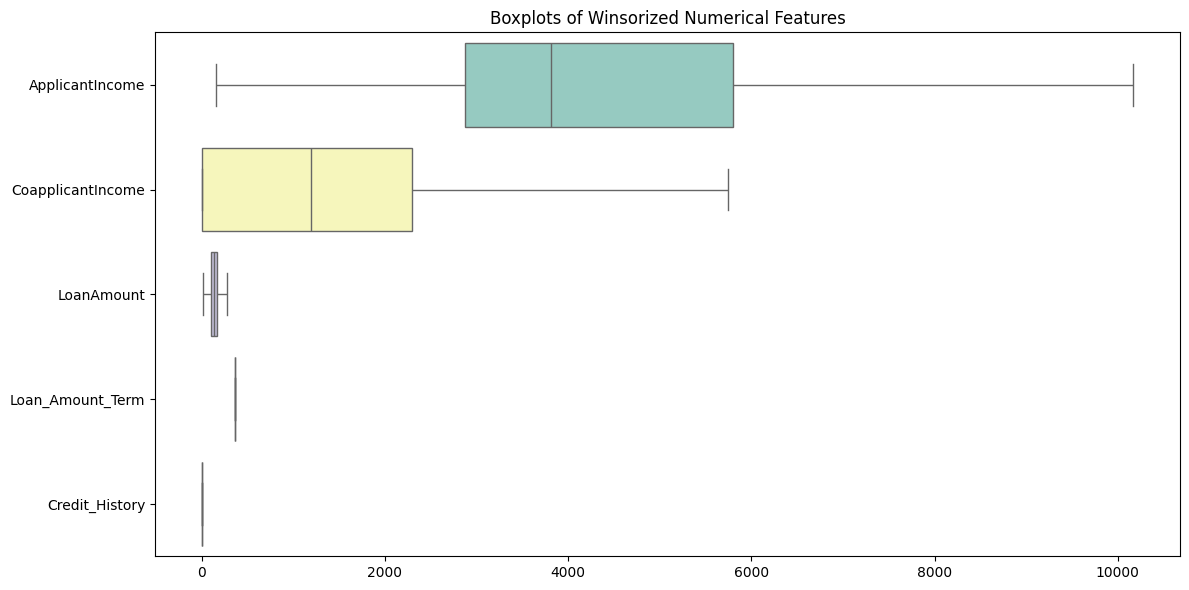

In [28]:
## apply winsorization
winz_data = winsorize(data,numeric)

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=winz_data[numeric], orient='h', palette='Set3')
plt.title('Boxplots of Winsorized Numerical Features')
plt.tight_layout()
plt.show()

## Preprocessing Pipeline

In [29]:
data = winz_data.copy()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

encode = LabelEncoder()
y_encode = encode.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y_encode,test_size=0.2,random_state=42)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Your features (already validated)
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Numeric pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combined preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [32]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [33]:
print(X_train.shape)
print(X_test.shape)

(491, 11)
(123, 11)


In [34]:
preprocessor.get_feature_names_out()

array(['num__ApplicantIncome', 'num__CoapplicantIncome',
       'num__LoanAmount', 'num__Loan_Amount_Term', 'num__Credit_History',
       'cat__Gender_Female', 'cat__Gender_Male', 'cat__Married_No',
       'cat__Married_Yes', 'cat__Dependents_0', 'cat__Dependents_1',
       'cat__Dependents_2', 'cat__Dependents_3+',
       'cat__Education_Graduate', 'cat__Education_Not Graduate',
       'cat__Self_Employed_No', 'cat__Self_Employed_Yes',
       'cat__Property_Area_Rural', 'cat__Property_Area_Semiurban',
       'cat__Property_Area_Urban'], dtype=object)

## Model Building

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

rfc = RandomForestClassifier(class_weight='balanced',random_state=42)
rfc.fit(X_train_processed,y_train)

y_pred1 = rfc.predict(X_test_processed)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("="*50)

print("Precision:",precision_score(y_test,y_pred1))
print("="*50)

print("Recall:",recall_score(y_test,y_pred1))
print("="*50)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("="*50)

print("Classification Report:\n",classification_report(y_test,y_pred1))


Accuracy: 0.6097560975609756
Precision: 0.6481481481481481
Recall: 0.875
Confusion Matrix:
 [[ 5 38]
 [10 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.65      0.88      0.74        80

    accuracy                           0.61       123
   macro avg       0.49      0.50      0.46       123
weighted avg       0.54      0.61      0.54       123



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

dtc = DecisionTreeClassifier(class_weight='balanced',random_state=42)
dtc.fit(X_train_processed,y_train)

y_pred2 = dtc.predict(X_test_processed)
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("="*50)

print("Precision:",precision_score(y_test,y_pred2,zero_division=0))
print("="*50)

print("Recall:",recall_score(y_test,y_pred2))
print("="*50)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print("="*50)

print("Classification Report:\n",classification_report(y_test,y_pred2))


Accuracy: 0.5934959349593496
Precision: 0.6630434782608695
Recall: 0.7625
Confusion Matrix:
 [[12 31]
 [19 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.28      0.32        43
           1       0.66      0.76      0.71        80

    accuracy                           0.59       123
   macro avg       0.53      0.52      0.52       123
weighted avg       0.57      0.59      0.57       123



## Cross Validating DTC

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,4],
    'class_weight': ['balanced']
}

dtc = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtc, param_grid, cv=5)
grid.fit(X_train_processed, y_train)
print("Tuned Decision Tree Classifier:")
print("="*50)

dtc_model = grid.best_estimator_

print("best params:",grid.best_params_)

y_grid = dtc_model.predict(X_test_processed)

print("Accuracy:",accuracy_score(y_test,y_grid))
print("="*50)

print("Precision:",precision_score(y_test,y_grid,zero_division=0))
print("="*50)

print("Recall:",recall_score(y_test,y_grid))
print("="*50)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_grid))
print("="*50)

print("Classification Report:\n",classification_report(y_test,y_grid))

Tuned Decision Tree Classifier:
best params: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.5040650406504065
Precision: 0.6376811594202898
Recall: 0.55
Confusion Matrix:
 [[18 25]
 [36 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.42      0.37        43
           1       0.64      0.55      0.59        80

    accuracy                           0.50       123
   macro avg       0.49      0.48      0.48       123
weighted avg       0.53      0.50      0.51       123



In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

dtc_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor),   # From earlier ColumnTransformer
    ('classifier', DecisionTreeClassifier(class_weight= 'balanced',max_depth=7 ,min_samples_leaf=2, min_samples_split=5,random_state=42))
])

scores = cross_val_score(dtc_pipe, X_train, y_train, cv=5, scoring='accuracy')
print("cross validating Decision Tree Classifier")
print("="*60)

print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())
print("="*60)

metrics = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(dtc_pipe, X_train, y_train, scoring=metrics, cv=5)

for metric in metrics:
    print(f"{metric.title()}: {results[f'test_{metric}'].mean():.4f}")


cross validating Decision Tree Classifier
CV Accuracy scores: [0.54545455 0.51020408 0.54081633 0.56122449 0.5       ]
Mean CV Accuracy: 0.5315398886827458
Accuracy: 0.5315
Precision: 0.7017
Recall: 0.5702
F1: 0.6280


In [42]:
# Extract transformed feature names
feature_names = dtc_pipe.named_steps['preprocessing'].get_feature_names_out()

# Map to importances
importances = dtc_model.feature_importances_  
dtc_feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# View top features
print(dtc_feat_imp.head(10))


num__ApplicantIncome            0.296443
num__LoanAmount                 0.280566
num__CoapplicantIncome          0.176139
cat__Property_Area_Semiurban    0.064654
cat__Dependents_2               0.040317
cat__Dependents_1               0.028414
cat__Education_Graduate         0.023180
cat__Dependents_0               0.017230
cat__Self_Employed_No           0.017100
cat__Married_Yes                0.015562
dtype: float64


## Visualizing performance of DTC

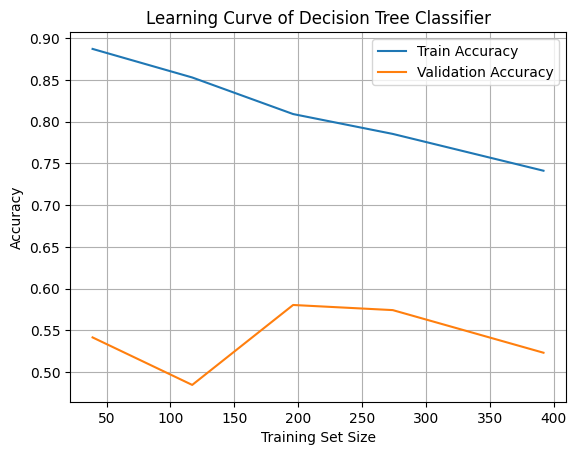

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    dtc_pipe,                     # your model pipeline (preprocessing + classifier)
    X_train, y_train,         # your raw features and labels (not preprocessed!)
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # metric to track
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]  # how much of the training set to use
)

import numpy as np
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Train Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve of Decision Tree Classifier")
plt.legend()
plt.grid(True)
plt.show()


### Insights from learning curve:

* The gap between train and validation accuracy suggests some overfitting: the tree learns patterns in training data better than it generalizes.

* However, since validation accuracy isn’t super low and both lines flatten toward the right, it may also signal the your model is capacity-limited (e.g., max_depth=3 or 5).

### Cross Validating RFC

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,400],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}


rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rfc, param_grid, cv=5)
grid.fit(X_train_processed, y_train)
print("Tuned Random Forest CLassifier")
print("="*50)

rfc_model = grid.best_estimator_

print("best params:",grid.best_params_)

y_grid = rfc_model.predict(X_test_processed)

print("Accuracy:",accuracy_score(y_test,y_grid))
print("="*50)

print("Precision:",precision_score(y_test,y_grid,zero_division=0))
print("="*50)

print("Recall:",recall_score(y_test,y_grid))
print("="*50)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_grid))
print("="*50)

print("Classification Report:\n",classification_report(y_test,y_grid))

Tuned Random Forest CLassifier
best params: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.5772357723577236
Precision: 0.6428571428571429
Recall: 0.7875
Confusion Matrix:
 [[ 8 35]
 [17 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.64      0.79      0.71        80

    accuracy                           0.58       123
   macro avg       0.48      0.49      0.47       123
weighted avg       0.53      0.58      0.54       123



In [45]:
rfc_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('classifier', RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=1, min_samples_split=2,n_estimators=200,random_state=42))
])

scores = cross_val_score(rfc_pipe, X_train, y_train, cv=5, scoring='accuracy')

print("cross validating Random Forest Classifier:")
print("="*60)

print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())
print("="*60)

metrics = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(rfc_pipe, X_train, y_train, scoring=metrics, cv=5)

for metric in metrics:
    print(f"{metric.title()}: {results[f'test_{metric}'].mean():.4f}")

cross validating Random Forest Classifier:
CV Accuracy scores: [0.58585859 0.62244898 0.62244898 0.70408163 0.67346939]
Mean CV Accuracy: 0.6416615130900845
Accuracy: 0.6417
Precision: 0.7142
Recall: 0.8099
F1: 0.7582


In [46]:
# Extract transformed feature names
feature_names = rfc_pipe.named_steps['preprocessing'].get_feature_names_out()

# Map to importances
importances = rfc_model.feature_importances_  
rfc_feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# View top features
print(rfc_feat_imp.head(10))


num__ApplicantIncome            0.215343
num__LoanAmount                 0.206407
num__CoapplicantIncome          0.149408
cat__Property_Area_Semiurban    0.057461
cat__Property_Area_Rural        0.034165
cat__Married_Yes                0.030570
cat__Education_Graduate         0.030354
cat__Married_No                 0.029228
cat__Education_Not Graduate     0.027964
cat__Dependents_0               0.027661
dtype: float64


## Visualizing performance of RFC

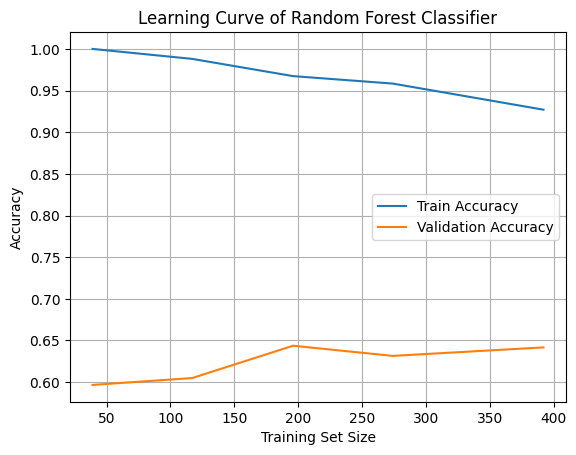

In [50]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    rfc_pipe, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

import numpy as np
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Train Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve of Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()


### Insights from Learning curve:

* No major gap between train and validation in larger data regions ⇒ Not overfitting Also not plateaued too low ⇒  Not underfitting.

* Decision Tree showed signs of overfitting. Random Forest has stronger generalization, better learning capacity.Our model is benefiting from more data, and performance is still improving.

## Visualizing Feature Importances of RFC and DTC

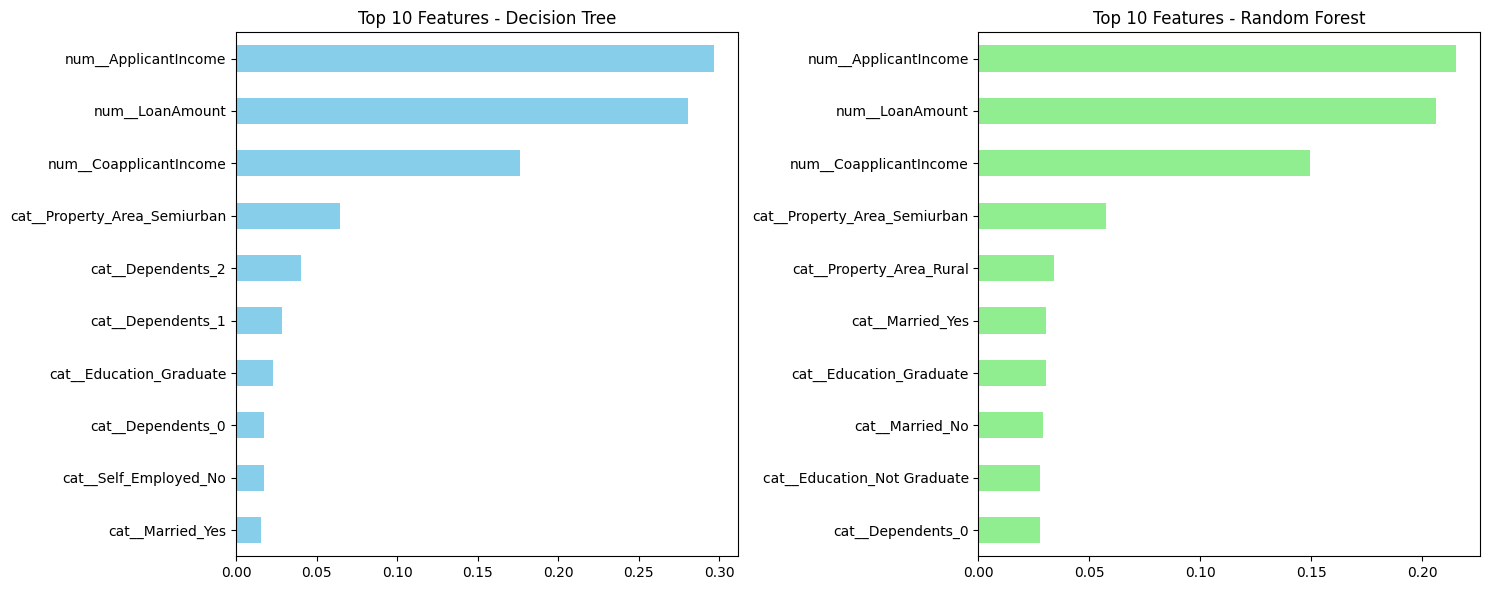

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns

# Decision Tree Feature Importance
dtc_feat_imp.head(10).plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title("Top 10 Features - Decision Tree")
axes[0].invert_yaxis()

# Random Forest Feature Importance
rfc_feat_imp.head(10).plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_title("Top 10 Features - Random Forest")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
